In [1]:
import os

manager_name = api_key = os.environ.get("VINE_MANAGER_NAME")
print(f"Manager name: {manager_name}")

ports_str = os.environ.get("VINE_MANAGER_PORTS", "9123, 9150")
ports = [int(p.strip()) for p in ports_str.split(",")]
print(f"Manager Ports: {ports}")

Manager name: floability-b90c222e-2992-4964-a537-09f67cf14e80
Manager Ports: [502, 510]


In [2]:
import os
from coffea.nanoevents import NanoEventsFactory
from coffea import processor

import dask_awkward as dak
import hist.dask as hda

import warnings
warnings.filterwarnings("error", module="coffea.*")


use_taskvine = True

if use_taskvine:
    from ndcctools.taskvine import DaskVine
    
    vine_manager = DaskVine(ports, name=manager_name)

    executor_args = {
        "scheduler": vine_manager,
        "worker_transfers": True,
        # "task_mode": "function-calls",
    }
else:
    from distributed import Client
    client = Client()

    executor_args = {}

In [3]:
import os

remote_url = 'https://raw.githubusercontent.com/floability/floability-examples/main/cms-physics-coffea/data/small_data.root'

data_abs_path = os.path.abspath("data/small_data.root")

use_remote = os.getenv("USE_REMOTE_DATA", "false").lower() in ("1", "true", "yes")

if use_remote:
    fileset = {remote_url: "Events"}
else:
    fileset = {data_abs_path: "Events"} 

Output()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f007eb40ad0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

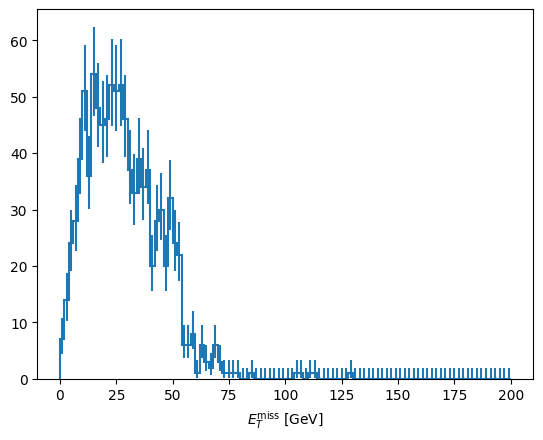

In [4]:
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents.schemas import NanoAODSchema
import hist.dask as hda
import os

NanoAODSchema.warn_missing_crossrefs = False

events = (
    NanoEventsFactory.from_root(
        fileset,        
        schemaclass=NanoAODSchema,
        metadata={"dataset": "SingleMu"},
        mode="dask"
    )
    .events()
)

q1_hist = (
    hda.Hist.new.Reg(100, 0, 200, name="met",
                     label=r"$E_{T}^{\text{miss}}\;[\mathrm{GeV}]$")
    .Double()
    .fill(events.MET.pt)
)

q1_hist.compute(**executor_args).plot1d()